In [3]:
# Library yg dibutuhkan
import numpy as np

In [4]:
# Pasangan data latih

XOR_X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

XOR_Y = np.array([
    [0],
    [1],
    [1],
    [0]
])

In [5]:
# Impor `Sequential` dari` keras.models`
from keras.models import Sequential

# Impor `Dense` dari` keras.layers`
from keras.layers import Dense

# Inisialisasi konstruktor
model = Sequential()

# Tambahkan lapisan masukan 
model.add(Dense(2, activation='sigmoid', input_shape=(2,)))

# Tambahkan satu lapisan tersembunyi
model.add(Dense(2, activation='sigmoid'))

# Tambahkan lapisan keluaran
model.add(Dense(1, activation='sigmoid'))

C:\Users\arul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Bentuk keluaran model
model.output_shape

# Ringkasan model
model.summary()

# Konfigurasi model
model.get_config()

# Buat daftar semua tensor bobot 
model.get_weights()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

[array([[-1.0056474 , -0.90693146],
        [ 0.8642756 , -0.25225288]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.04363036,  0.15699196],
        [ 0.78648674,  0.90475833]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.28353024],
        [0.7484926 ]], dtype=float32),
 array([0.], dtype=float32)]

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(XOR_X, XOR_Y,epochs=1000, batch_size=1, verbose=1)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3667 - loss: 0.8164      
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6333 - loss: 0.6571 
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2667 - loss: 0.8831     
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2667 - loss: 0.8741     
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5667 - loss: 0.7019 
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4333 - loss: 0.7822     
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7333 - loss: 0.5960 
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2667 - loss: 0.8701     
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.6333 - loss: 0.6628
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7333 - loss: 0.5967 
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2667 - loss: 0.8670     
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━

In [8]:
Hasil_Prediksi_Keras = model.predict(XOR_X)
print(Hasil_Prediksi_Keras)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.50391567]
 [0.5032451 ]
 [0.50004655]
 [0.4992332 ]]


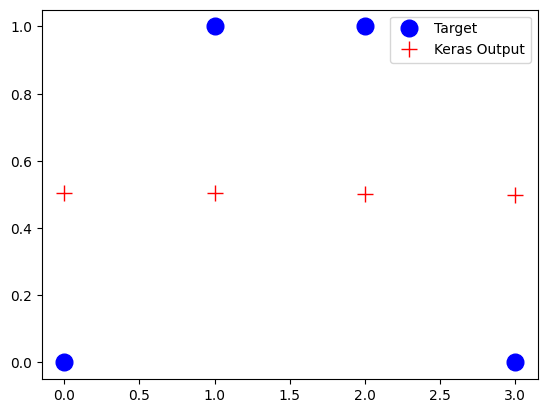

In [9]:
import matplotlib.pyplot as plt
plt.plot(XOR_Y, 'bo', label='Target', linewidth=2, markersize=12)
plt.plot(Hasil_Prediksi_Keras, 'r+', label='Keras Output', linewidth=2, markersize=12)
plt.legend(loc='upper right')
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse2  = mean_squared_error(XOR_Y, Hasil_Prediksi_Keras)
rmse2 = sqrt(mean_squared_error(XOR_Y, Hasil_Prediksi_Keras))
print('MSE =',mse2)
print('RMSE =',rmse2)

MSE = 0.2499709101667218
RMSE = 0.4999709093204542
